## **IMPORTING THE LIBRARIES**

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.metrics import confusion_matrix,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **IMPORTING DATASET**

In [219]:
 dataset = pd.read_csv('spam.csv',encoding = 'Windows-1252')
 dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **CHECKING NULL VALUES**


In [220]:
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [221]:
#since unnamed 2,3,4 has more null values we only consider v1,v2 as our dataset
dataset = dataset[['v2','v1']]
#labelling v1,v2 as categories & messages respectively
dataset = dataset.rename(columns={'v2':'messages', 'v1': 'categories'})
dataset.head()

,messages,categories
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


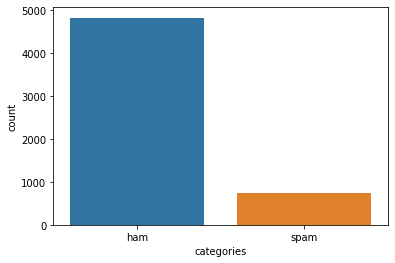

In [222]:
sns.countplot(x = 'categories',data = dataset)

**TOTAL VALUES OF HAM IS AROUND 4800 AND FOR SPAM IS AROUND 800**

## **TEXT CLEANING**

In [223]:
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text
 

In [224]:
 # clean the messages
dataset['clean_text'] = dataset['messages'].apply(clean_text)
dataset.head()

,messages,categories,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think goes usf lives around though


## **INPUT SPLIT**

In [225]:
X = dataset['clean_text']
y = dataset['categories']

## **MODEL TRAINING**

In [226]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, X, y):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(X_train, y_train)
    #getting confusion matrix
    y_pred = pipeline_model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    print('confusion matrix:\n',cm)
    #plotting confusion matrix
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d') 
    #checking accuracy
    lra = accuracy_score(y_test,y_pred)
    print('accuracy score = ',lra)
    
   

## **LOGISTIC REGRESSION**

confusion matrix:
 [[1205    1]
 [  43  144]]
accuracy score =  0.968413496051687


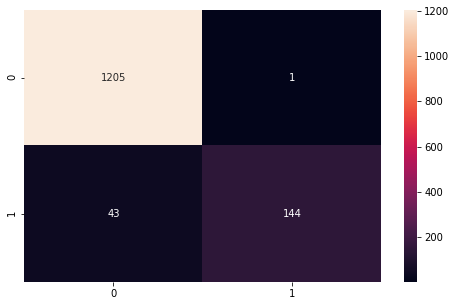

In [227]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

## **MULTINOMIAL NAIVE BAYES**

confusion matrix:
 [[1206    0]
 [  46  141]]
accuracy score =  0.9669777458722182


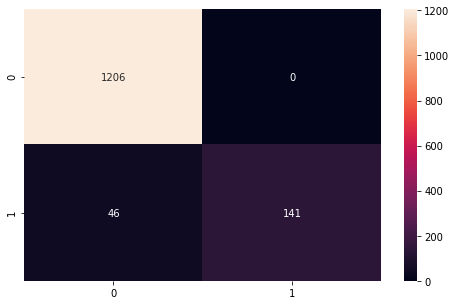

In [228]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

## **KERNEL SVM**

confusion matrix:
 [[1206    0]
 [  29  158]]
accuracy score =  0.9791816223977028


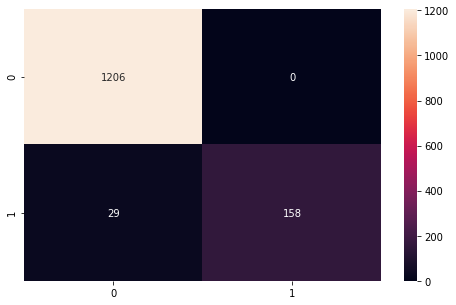

In [229]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf')
classify(model, X, y)

## **DECISION TREE**

confusion matrix:
 [[1193   13]
 [  45  142]]
accuracy score =  0.9583632447954056


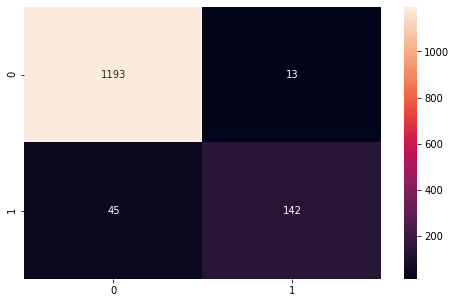

In [230]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy')
classify(model, X, y)

## **RANDOM FOREST**

confusion matrix:
 [[1205    1]
 [  42  145]]
accuracy score =  0.9691313711414213


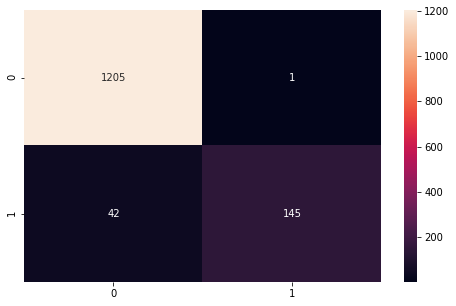

In [231]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, criterion = 'entropy',random_state = 0)
classify(model, X, y)